## **Predicción de precios de los aguacates PLU 4046, 4225 y 4770 utilizando modelos de regresión.**

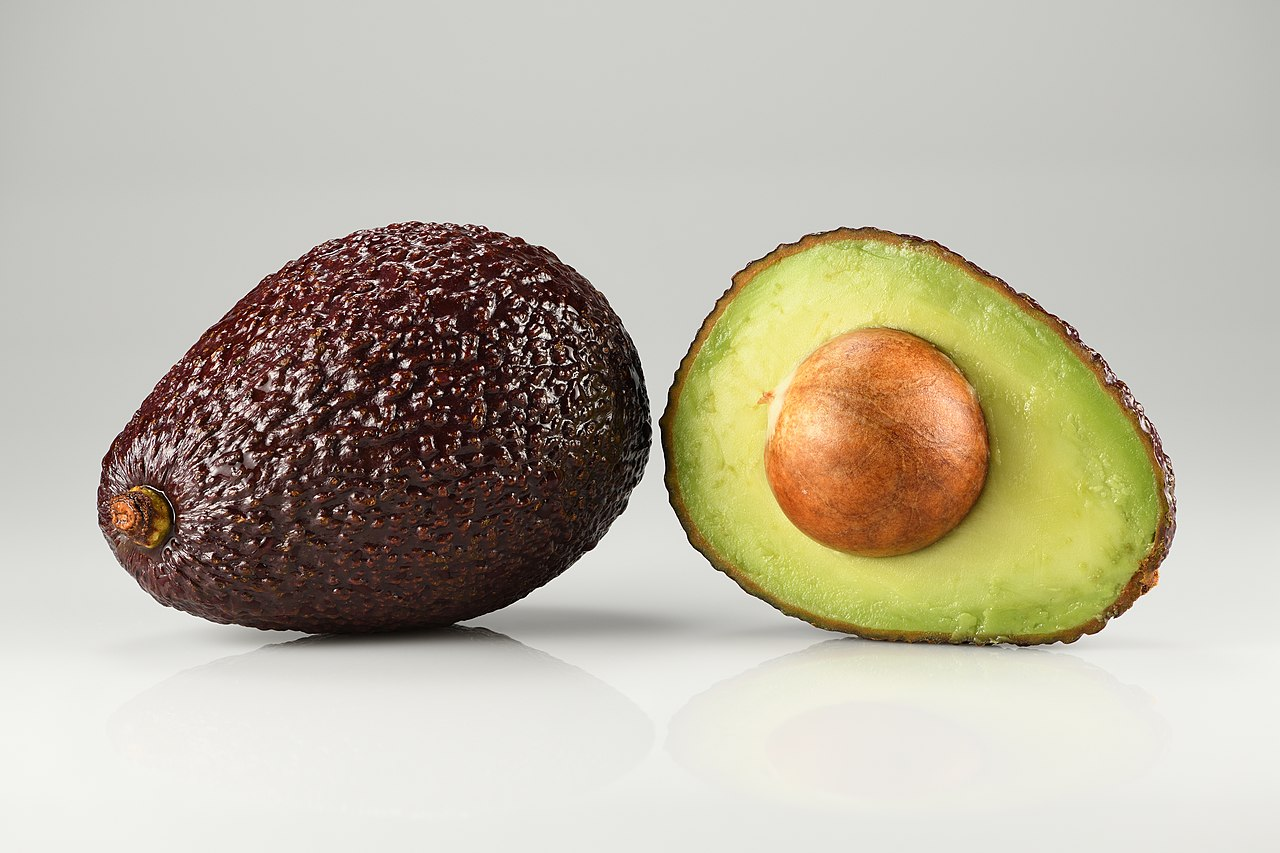

In [ ]:
#@title Librerias
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import imageio
import numpy as np
import plotly as py
import plotly.express as px
# import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.metrics import *
sns.set_theme()
from IPython.display import HTML

# Using plotly + cufflinks in offline mode
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# **Significado de las variables categóricas**

*   **AveragePrice:** El precio promedio de un solo aguacate.
*   **Total Volume:** Número total de acuagates vendidos
*   **4046:** Número total de aguacates con PLU 4046 vendidos.
*   **4225:** Número total de aguacates con PLU 4225 vendidos.
*   **4770:** Número total de aguacates con PLU 4770 vendidos.
*   **Total Bags:** Cantidad total de bolsas vendidas.
*   **Small Bags:** Cantidad de bolsas pequeñas vendidas.
*   **Large Bags:** Cantidad bolsas grandes vendidas.
*   **XLarge Bags:** Cantidad de bolsas extra grandes vendidas.
*   **region:** La región en donde se vendieron los aguacates.






# **IMPORTANTE**

Los códigos PLU se utilizan para identificar los diferentes tipos de aguacates según su variedad, tamaño y origen.



*   **PLU 4046:** Se utiliza para identificar los aguacates Hass de tamaño estándar. Los aguacates Hass son una variedad de aguacate muy popular debido a su sabor y textura cremosa.
*   **PLU 4225:** Se utiliza para identificar los aguacates Hass de tamaño grande. Los aguacates Hass grandes son similares a los de tamaño estándar, pero son un poco más grandes.
*   **PLU 4770:** Se utiliza para identificar otros tipos de aguacates diferentes a los Hass, como por ejemplo, los aguacates Fuerte, Bacon, Zutano, entre otros.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ruta del archivo CSV
file_path = "/content/drive/My Drive/PFinal_IA/avocado.csv"

In [ ]:
df = pd.read_csv(file_path)
num_rows, num_cols = df.shape
print(f"El DataFrame tiene {num_rows} filas y {num_cols} columnas")
df.head(10)

El DataFrame tiene 18249 filas y 14 columnas


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [ ]:
# Eliminar columnas en una segunda línea de código

columnas_a_eliminar = ['Unnamed: 0', 'Date', 'type', 'year']
df = df.drop(columnas_a_eliminar, axis=1)

In [ ]:
df_avocado = df

In [ ]:
print(df_avocado.shape)
df_avocado.head(5)

(18249, 10)


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany


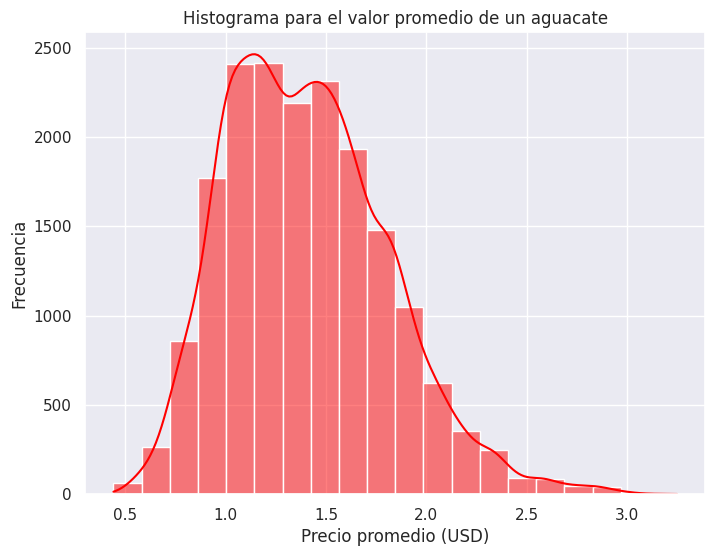

In [ ]:
#@title Histograma para el valor promedio de un aguacate

AveragePrice = df_avocado["AveragePrice"]

# Ajustar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear el histograma con menos bins
sns.histplot(AveragePrice, kde=True, color='red', palette='Blue', bins=20)

# Agregar etiquetas y título al histograma
plt.xlabel('Precio promedio (USD)')
plt.ylabel('Frecuencia')
plt.title('Histograma para el valor promedio de un aguacate')

# Mostrar el histograma
plt.show()

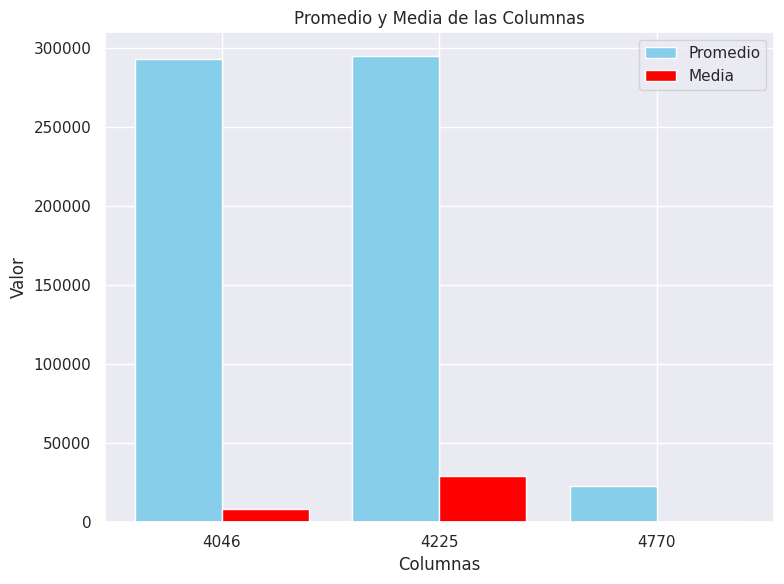

In [ ]:
#@title Promedio y la media para los tres tipos de aguacate (4046, 4225, 4770)

# seleccionar columnas específicas
columnas = ['4046', '4225', '4770']
data_promyme = df_avocado[columnas]

# calcular el promedio de cada columna
promedio = data_promyme.mean()

# calcular la media de cada columna
media = data_promyme.median()

# ajustar el tamaño de la figura y el ancho de las barras
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.4

# generar los índices para las barras
index = np.arange(len(columnas))

# graficar los promedios y la media
ax.bar(index, promedio, color='skyblue', width=bar_width, label='Promedio')
ax.bar(index + bar_width, media, color='red', width=bar_width, label='Media')

ax.set_xlabel('Columnas')
ax.set_ylabel('Valor')
ax.set_title('Promedio y Media de las Columnas')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(columnas)

ax.legend()

# mostrar la gráfica
plt.tight_layout()
plt.show()

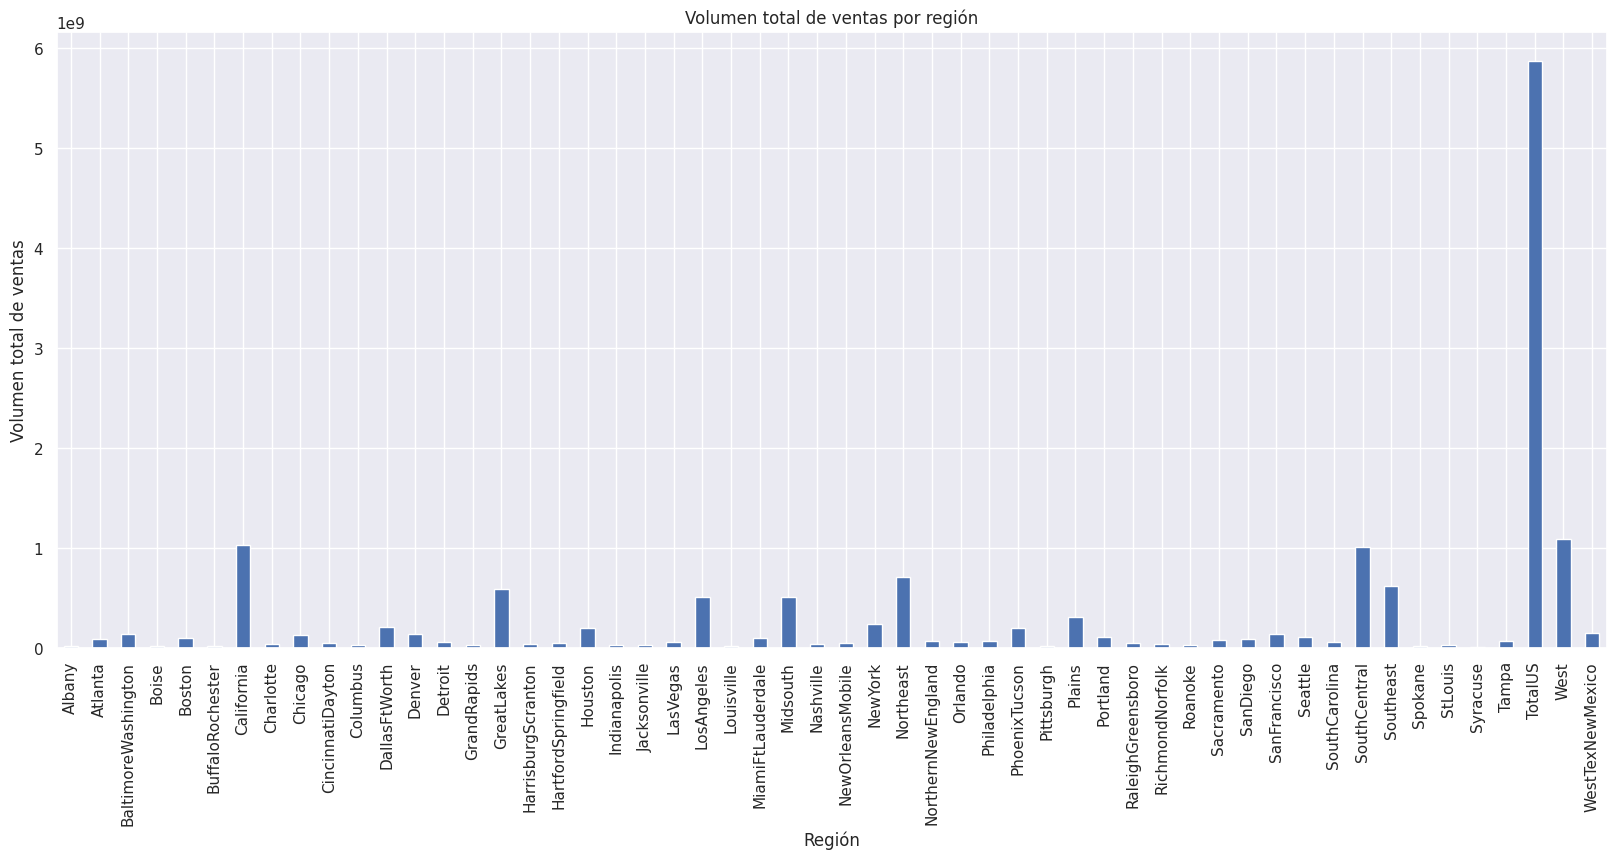

<Figure size 800x600 with 0 Axes>

In [ ]:
# Agrupar los datos por región y sumar el volumen total de ventas
ventas_por_region = df_avocado.groupby('region')['Total Volume'].sum()

# Crear un gráfico de barras
plt.figure(figsize=(20,8))
ventas_por_region.plot(kind='bar')

# Agregar títulos y etiquetas a los ejes
plt.title('Volumen total de ventas por región')
plt.xlabel('Región')
plt.ylabel('Volumen total de ventas')

# Modificar la posición y etiquetas de los ticks en el eje X
idx = range(len(ventas_por_region))
labels = ventas_por_region.index.tolist()
plt.xticks(idx, labels, rotation=90)

# ajustar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Mostrar el gráfico
plt.show()

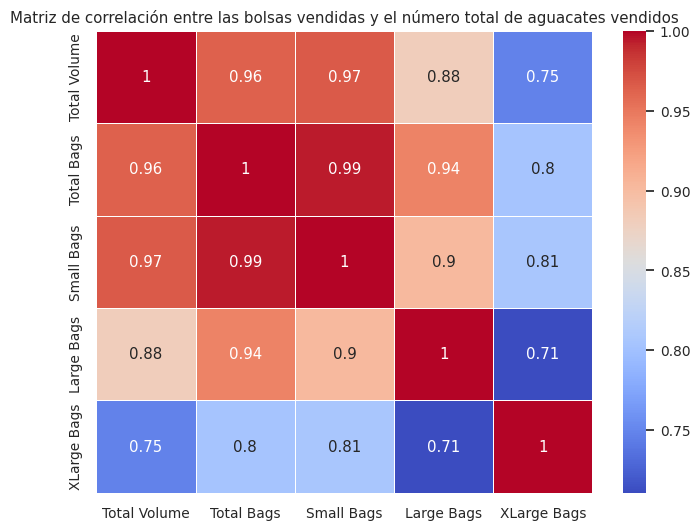

In [ ]:
# seleccionar las columnas relevantes para la matriz de correlación
cols = ['Total Volume', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

# calcular la matriz de correlación
corr_matrix = df[cols].corr()

# generar el mapa de calor con tamaño ajustado
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura

sns.set(font_scale=0.9)  # Ajustar el tamaño de la fuente

ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)  # Añadir linewidths para separar las celdas

# agregar un título al mapa de calor
ax.set_title('Matriz de correlación entre las bolsas vendidas y el número total de aguacates vendidos')

plt.show()



#**1.**   **Decision Tree Regressor**




In [ ]:
# Extraer la columna 'region' como un array
columna_region = df_avocado['region'].values.reshape(-1, 1)

# Inicializar y ajustar el codificador ordinal
ordinal_encoder = OrdinalEncoder()
columna_region_codificada = ordinal_encoder.fit_transform(columna_region)

# Actualizar la columna 'region' en el dataframe
df_avocado['region'] = columna_region_codificada.flatten()

# Verificar el tipo de datos de la columna 'region' codificada
print(df_avocado.shape)
print(df_avocado['region'].dtype)
df_avocado.head(5)

(18249, 10)
float64


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0


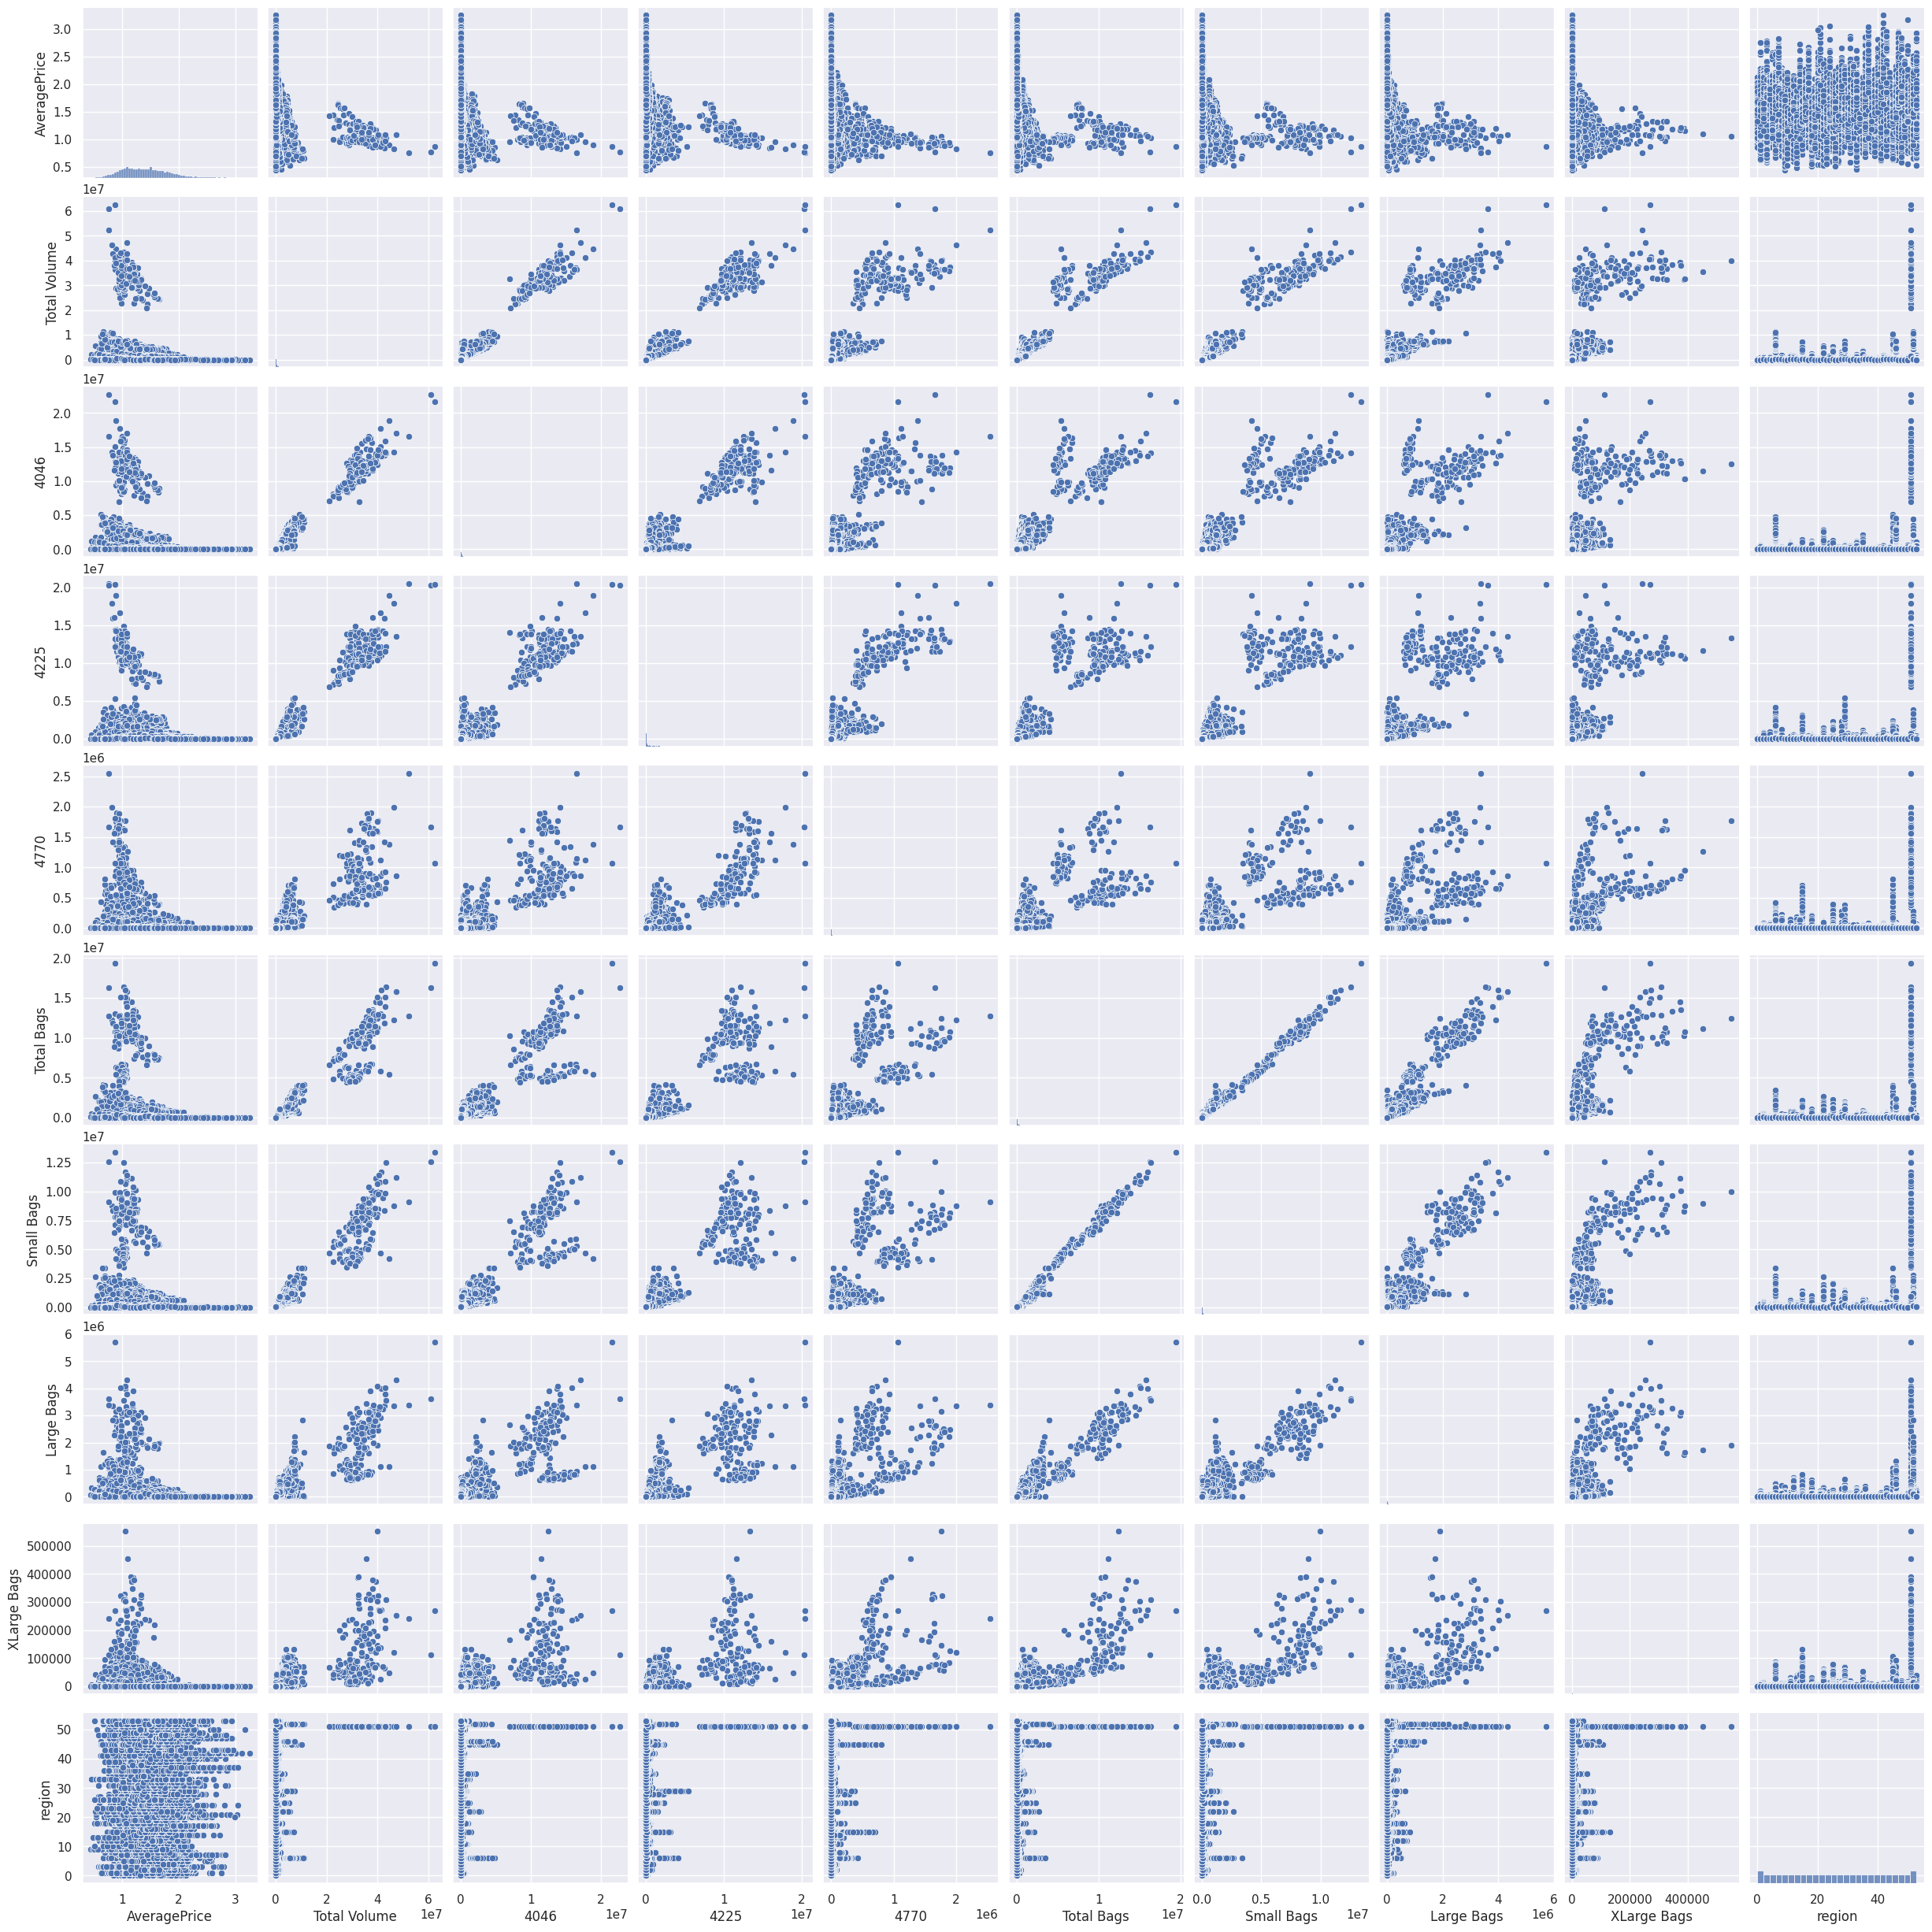

(18249, 9) (18249, 1)


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0


In [ ]:
X = df_avocado.values[:, 1:]  # Asigna todas las filas y todas las columnas excepto la primera columna
y = df_avocado.values[:, [1]]

sns.set(rc={'figure.figsize': (12, 12)})  # Ajusta el tamaño a tu preferencia

sns.pairplot(df_avocado, diag_kind="hist")  # kind="kde"

plt.show()

print(X.shape, y.shape)

df_avocado.head()

In [ ]:
#ax = sns.heatmap(df_avocado, annot=True, cmap='coolwarm', linewidths=0.5)
df_avocado.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.082281
region,-0.011716,0.174176,0.192073,0.145726,0.095252,0.175256,0.164702,0.198768,0.082281,1.000000


In [ ]:
delete = ['Total Bags']
df = df.drop(delete, axis=1)
df_avocado = df

In [ ]:
df_avocado.corr()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.174730,-0.172940,-0.117592,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.967238,0.880640,0.747157,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.925280,0.838645,0.699377,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.916031,0.810015,0.688809,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.802733,0.698471,0.679861,0.095252
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,1.000000,0.902589,0.806845,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.902589,1.000000,0.710858,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.806845,0.710858,1.000000,0.082281
region,-0.011716,0.174176,0.192073,0.145726,0.095252,0.164702,0.198768,0.082281,1.000000


In [ ]:
max_depth_1 =  2
max_depth_2 =  10

regressor = DecisionTreeRegressor(max_depth=max_depth_1)
regressorSA = DecisionTreeRegressor(max_depth=max_depth_2)
regressor.fit(X, y)
regressorSA.fit(X, y)

DecisionTreeRegressor(max_depth=10)

#**Mean Squared Error (MSE)**

In [ ]:
s = cross_val_score(regressor, np.array([df_avocado['Total Volume']]).T, df_avocado['AveragePrice'], cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE depth: 2 %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

s = cross_val_score(regressorSA, np.array([df_avocado['Total Volume']]).T, df_avocado['AveragePrice'], cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE depth: 6 %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE depth: 2 0.105 (+/- 0.00631)
MSE depth: 6 0.109 (+/- 0.00414)


# **Tuning**

# **DecisionTreeRegressor**

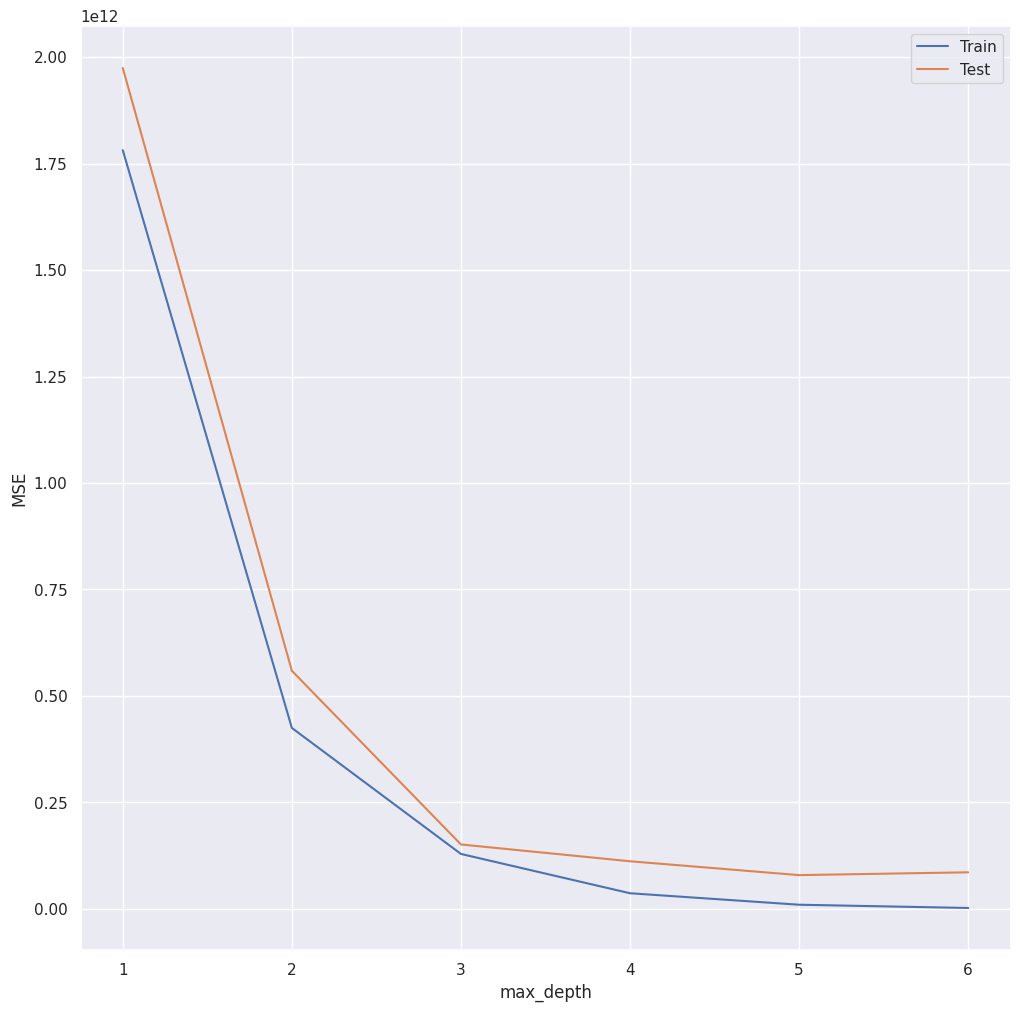

In [ ]:
def show_curve(est, param_name, param_range):
    train_scores = []
    test_scores = []

    for param_value in param_range:
        X = df_avocado.values[:, 1:]  # Asigna todas las filas y todas las columnas excepto la primera columna
        y = df_avocado.values[:, [1]]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

        # Crear y entrenar el modelo con el valor actual del hiperparámetro
        model = est(max_depth=param_value)
        model.fit(X_train, y_train)

        # Predecir los valores en el conjunto de entrenamiento y prueba
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calcular el error cuadrático medio en el conjunto de entrenamiento y prueba
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)

        train_scores.append(train_mse)
        test_scores.append(test_mse)

    # Graficar la curva de rendimiento
    plt.plot(param_range, train_scores, label="Train")
    plt.plot(param_range, test_scores, label="Test")
    plt.xlabel(param_name)
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

# Definir el rango de valores para max_depth
maxdepth_range = range(1, 7)

# Llamar a la función show_curve con DecisionTreeRegressor
show_curve(DecisionTreeRegressor, "max_depth", maxdepth_range)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
regressor_1 = DecisionTreeRegressor(max_depth=2)
regressor_6 = DecisionTreeRegressor(max_depth=6)
#X = df_avocado.values[:, 1:]  # Asigna todas las filas y todas las columnas excepto la primera columna
#y = df_avocado.values[:, [1]]
depht_1=2
depht_6=6
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
regressor_1.fit(X_train,y_train)
regressor_6.fit(X_train,y_train)

print("max depht = 2")
mse_rf = mean_squared_error(y_test, regressor_1.predict(X_test))
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regressor_1.predict(X_test)))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regressor_1.predict(X_test))))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regressor_1.predict(X_test)))

print("max depht = 6")
mse_rf = mean_squared_error(y_test, regressor_6.predict(X_test))
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regressor_6.predict(X_test)))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regressor_6.predict(X_test))))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regressor_6.predict(X_test)))

max depht = 2
MSE depth split data  559115170827.904
RMSE depth split data  747740.042
MAE depth split data  357219.779
max depht = 6
MSE depth split data  74673232962.055
RMSE depth split data  273264.035
MAE depth split data  31009.153


In [ ]:
s = cross_val_score(regressor_1, np.array([df_avocado['Total Volume']]).T, df_avocado['AveragePrice'], cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE depth: 2 %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

s = cross_val_score(regressor_6, np.array([df_avocado['Total Volume']]).T, df_avocado['AveragePrice'], cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE depth: 6 %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE depth: 2 0.105 (+/- 0.00385)
MSE depth: 6 0.103 (+/- 0.00487)


# **Random Forest Regression**

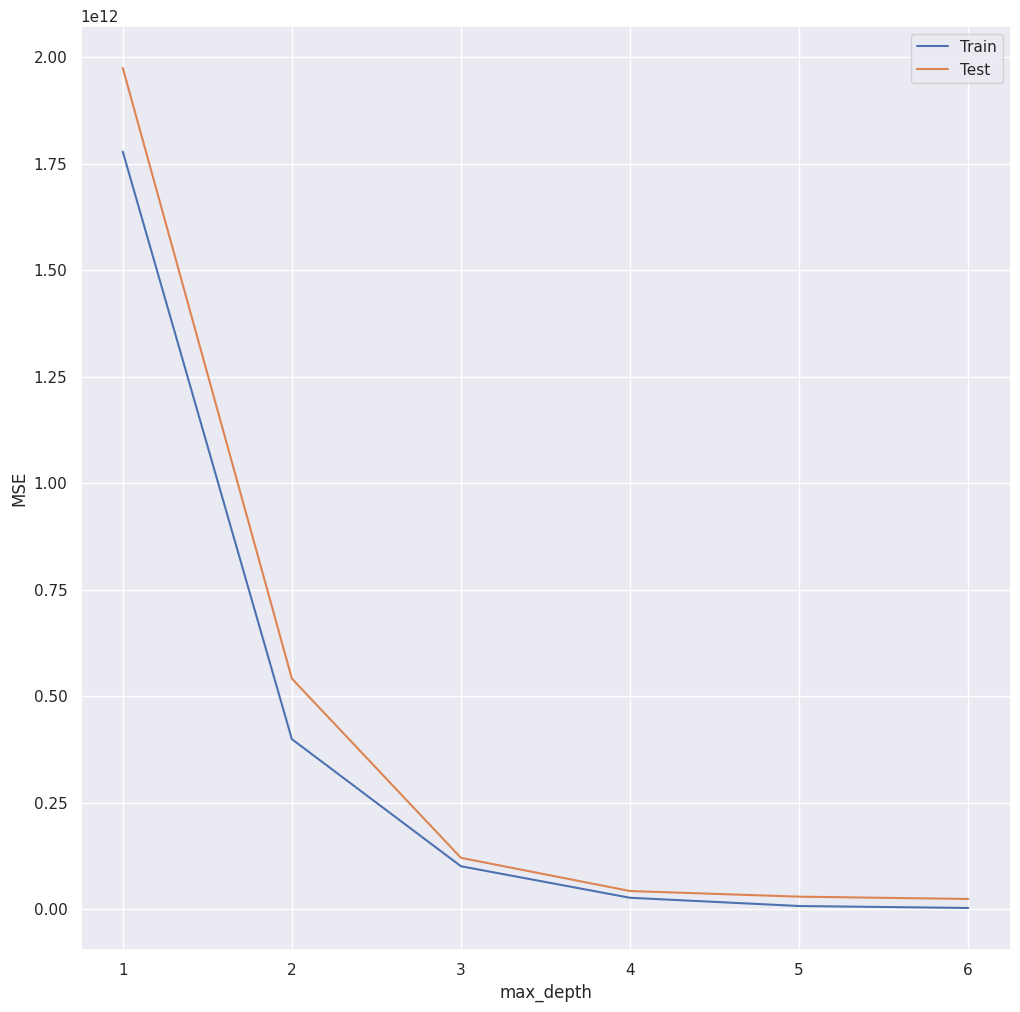

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

def show_curve1(est, param_name, param_range):
    train_scores = []
    test_scores = []

    for param_value in param_range:
        X = df_avocado.values[:, 1:]
        y = df_avocado.values[:, [1]]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

        model = est(max_depth=param_value)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)

        train_scores.append(train_mse)
        test_scores.append(test_mse)

    plt.plot(param_range, train_scores, label="Train")
    plt.plot(param_range, test_scores, label="Test")
    plt.xlabel(param_name)
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

# Definir el rango de valores para max_depth
maxdepth_range = range(1, 7)

# Llamar a la función show_curve con RandomForestRegressor
show_curve1(RandomForestRegressor, "max_depth", maxdepth_range)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
regressor_1 = RandomForestRegressor(max_depth=2)
regressor_6 = RandomForestRegressor(max_depth=6)
#X = df_avocado.values[:, 1:]  # Asigna todas las filas y todas las columnas excepto la primera columna
#y = df_avocado.values[:, [1]]
depht_1=1
depht_6=6
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
regressor_1.fit(X_train,y_train)
regressor_6.fit(X_train,y_train)

print("max depht = 2")
mse_rf = mean_squared_error(y_test, regressor_1.predict(X_test))
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regressor_1.predict(X_test)))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regressor_1.predict(X_test))))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regressor_1.predict(X_test)))

print("max depht = 6")
mse_rf = mean_squared_error(y_test, regressor_6.predict(X_test))
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regressor_6.predict(X_test)))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regressor_6.predict(X_test))))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regressor_6.predict(X_test)))

max depht = 2
MSE depth split data  542564837442.250
RMSE depth split data  736590.006
MAE depth split data  353242.204
max depht = 6
MSE depth split data  24147189660.287
RMSE depth split data  155393.660
MAE depth split data  18795.092


In [ ]:
s = cross_val_score(regressor_1, np.array([df_avocado['Total Volume']]).T, df_avocado['AveragePrice'], cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE depth: 2 %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

s = cross_val_score(regressor_6, np.array([df_avocado['Total Volume']]).T, df_avocado['AveragePrice'], cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE depth: 6 %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE depth: 2 0.104 (+/- 0.00383)
MSE depth: 6 0.102 (+/- 0.00354)


# Creación de la red Neuronal


# **Modelo 1**

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Cargar y preprocesar los datos
df_avocadoRN = df_avocado
X = df_avocadoRN.iloc[:, :-1].values
y = df_avocado['AveragePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Definir la arquitectura de la red neuronal
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida sin función de activación para regresión
])

# Compilar el modelo
model_2.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
history_2 = model_2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss = model_2.evaluate(X_test, y_test)
print("Test MSE:", test_loss)

Epoch 1/50
365/365 [==============================] - 2s 3ms/step - loss: 8052284928.0000 - val_loss: 185198816.0000
Epoch 2/50
365/365 [==============================] - 1s 2ms/step - loss: 23395649536.0000 - val_loss: 226903312.0000
Epoch 3/50
365/365 [==============================] - 1s 3ms/step - loss: 82128944.0000 - val_loss: 14174455.0000
Epoch 4/50
365/365 [==============================] - 1s 3ms/step - loss: 16410622.0000 - val_loss: 36496888.0000
Epoch 5/50
365/365 [==============================] - 1s 3ms/step - loss: 11025089.0000 - val_loss: 4409044.0000
Epoch 6/50
365/365 [==============================] - 1s 3ms/step - loss: 60603844.0000 - val_loss: 35763312.0000
Epoch 7/50
365/365 [==============================] - 1s 3ms/step - loss: 32925156.0000 - val_loss: 6189336.0000
Epoch 8/50
365/365 [==============================] - 1s 2ms/step - loss: 5708785.0000 - val_loss: 2365293.7500
Epoch 9/50
365/365 [==============================] - 1s 2ms/step - loss: 823862208.0

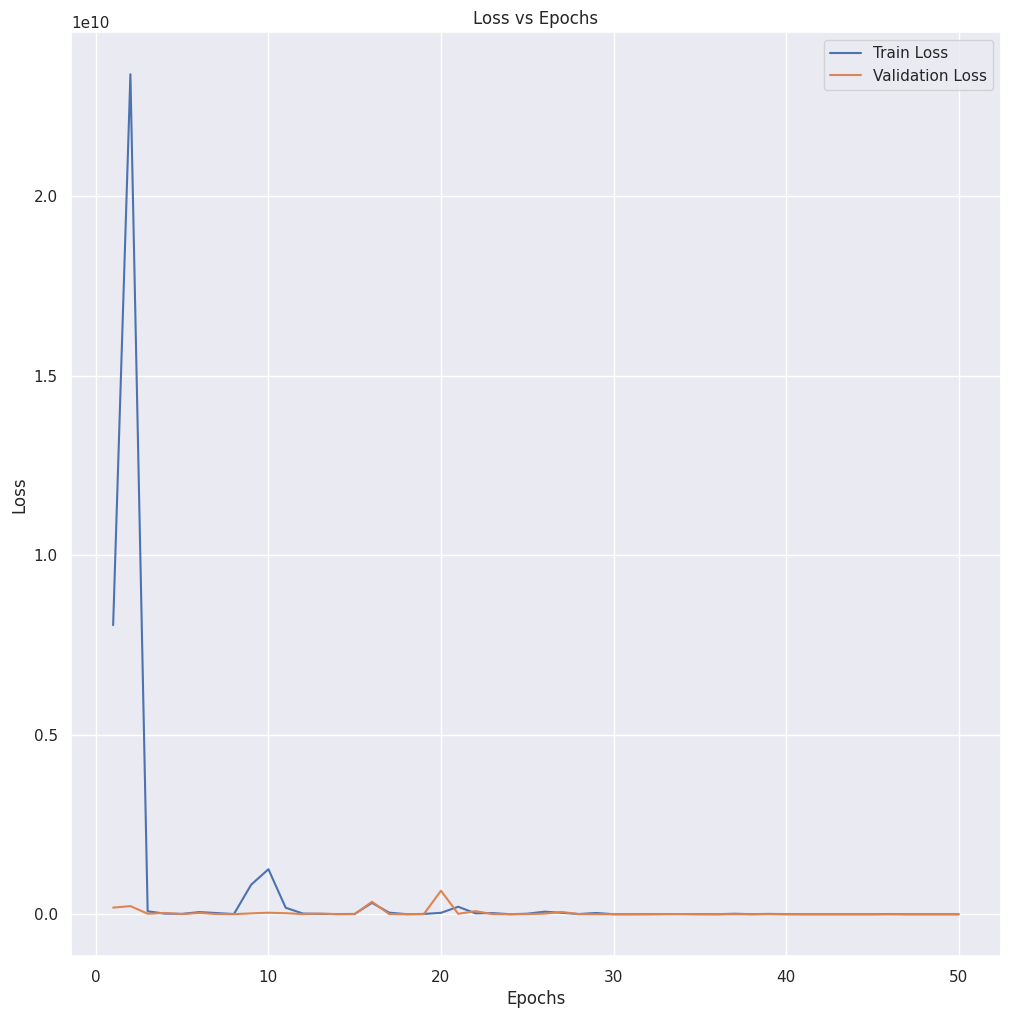

In [ ]:
import matplotlib.pyplot as plt

# Obtener los valores de pérdida del conjunto de entrenamiento y validación
train_loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

# Obtener el número de épocas
epochs = range(1, len(train_loss) + 1)

# Graficar la pérdida del conjunto de entrenamiento y validación
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

# **Modelo 2 - Usando StandardScaler**

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar y preprocesar los datos
data = df_avocado
X = data.iloc[:, :-1].values
y = df_avocado['AveragePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir la arquitectura de la red neuronal
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida sin función de activación para regresión
])

# Compilar el modelo
model_1.compile(optimizer='adam', loss='mse')

# Visualizar el resumen de la red neuronal
model_1.summary()

# Entrenar el modelo
history_1 = model_1.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss = model_1.evaluate(X_test_scaled, y_test)
print("Test MSE:", test_loss)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1152      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
365/365 [==============================] - 2s 4ms/step - loss: 0.1135 - val_loss: 0.0118
Epoch 2/50
365/365 [==============================] - 1s 3ms/step - loss: 0.0095 - val_loss: 0.0016
Epoch 3/50
365/365 [==============================] - 1s 3ms/step - loss: 0.0046 - val_loss: 0.0015
Epoch 4/50
365/3

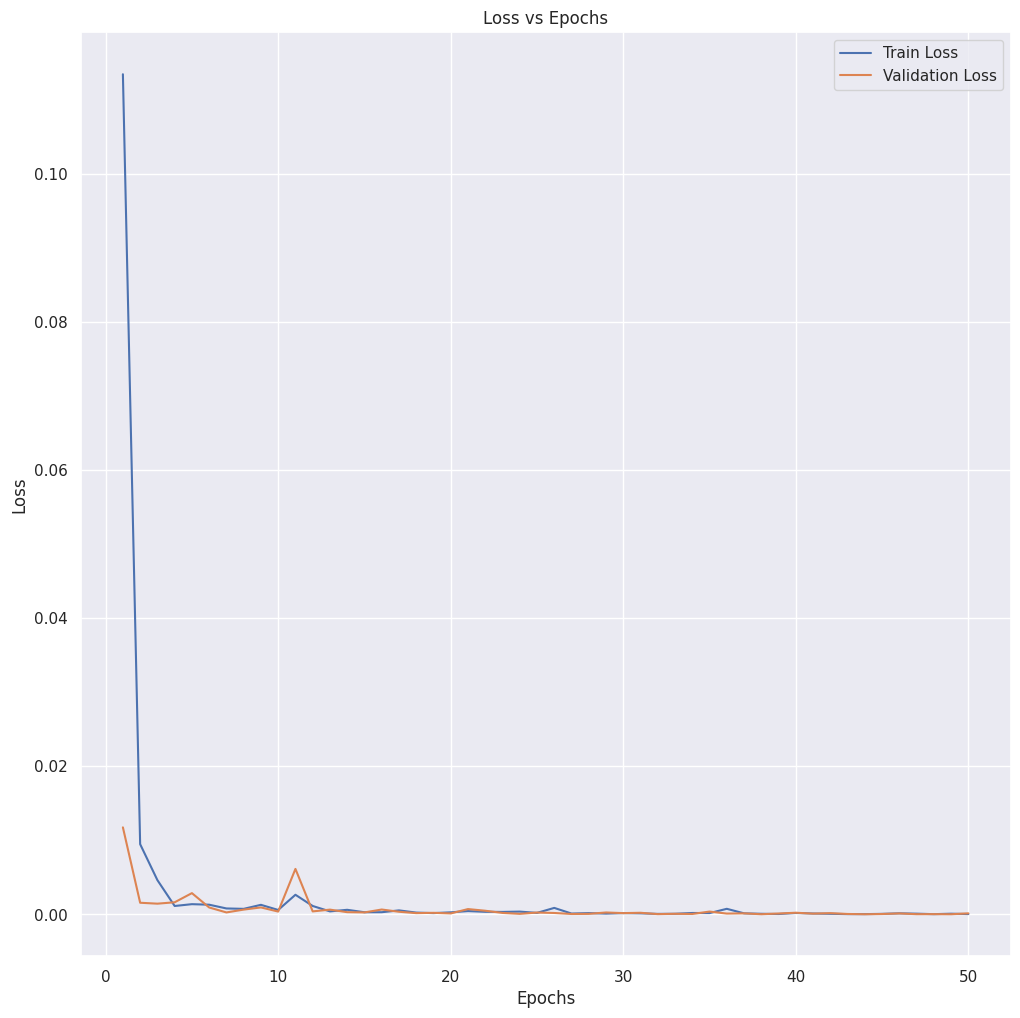

In [ ]:
# Obtener los valores de pérdida del conjunto de entrenamiento y validación
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

# Obtener el número de épocas
epochs = range(1, len(train_loss) + 1)

# Graficar la pérdida del conjunto de entrenamiento y validación
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

# **Modelo 3 - Usando StandarScaler y Dropout**

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar y preprocesar los datos
data = df_avocado
X = data.iloc[:, :-1].values
y = df_avocado['AveragePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir la arquitectura de la red neuronal con Dropout
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.2),  # Aplicar Dropout con una tasa del 20%
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Aplicar Dropout con una tasa del 20%
    tf.keras.layers.Dense(1)  # Capa de salida sin función de activación para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Visualizar el resumen de la red neuronal
model.summary()

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test_scaled, y_test)
print("Test MSE:", test_loss)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1152      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
365/365 [==============================] 

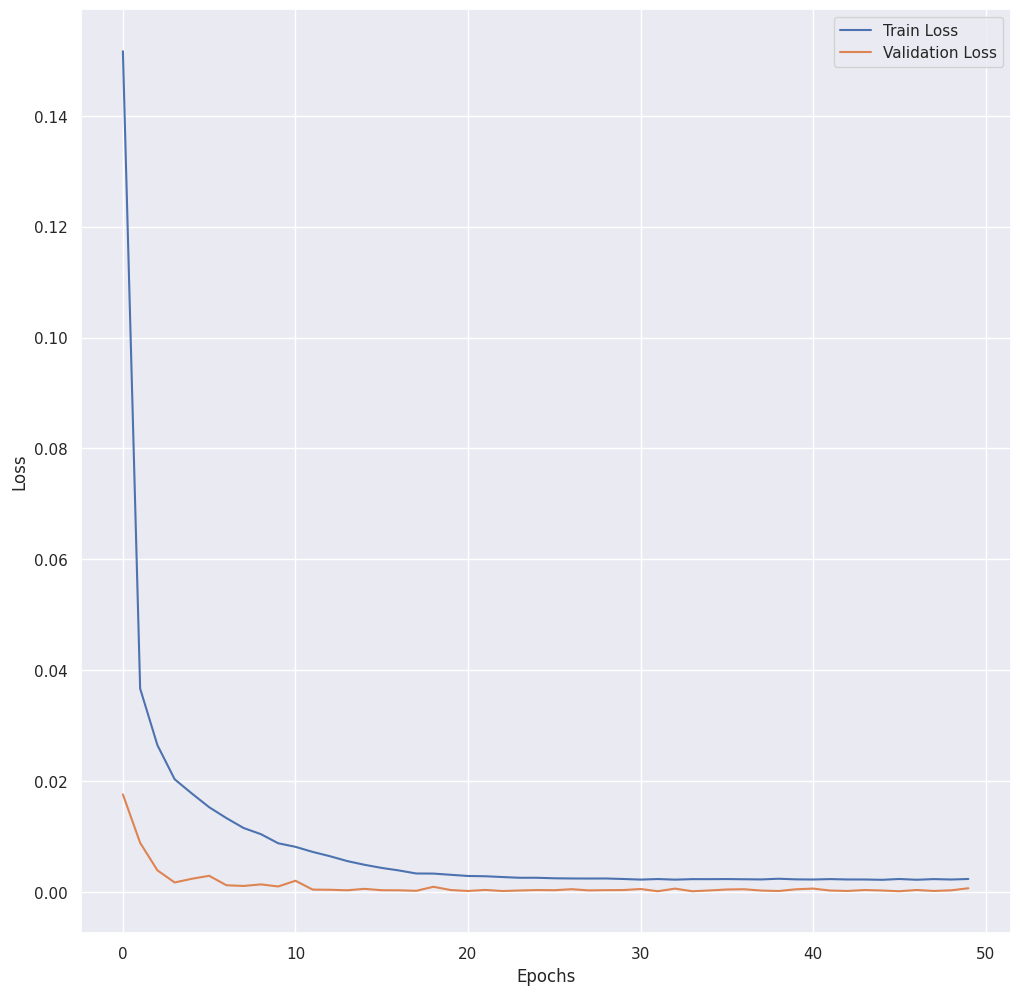

In [ ]:
# Obtener las pérdidas de entrenamiento y validación
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Graficar las curvas de pérdida
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()